# Phase 3 - Vehicle Classification

This is an open ended phase. You must build a classifier for the Stanford Cars Dataset. You can use any techniques and knowledge from Phase 1 & 2 to aid you.

# Imports

Import all the libraries you need for your project

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import time
import os
import copy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import io
import skimage

from skimage import data, io, filters
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import csv

In [ ]:
#Chose this, the training size was 8144 images but that probably isn't the correct input_size
input_size = 8144
num_epochs = 10
lr = 2e-4
num_classes = 196

## Load Dataset
The Stanford Dataset is not provided in ```torchvision.datasets```. You will need to create your inherit from ```Dataset``` class to load the dataset and overload the ```___init__()```, ```__len__()```, and ```__getitem__()``` functions.

You will find the following link useful to help create the dataset class: https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

If you wish, you can create another method in the class: ```visualize()``` to help visualize the data. This is optional and will not be graded

In [ ]:
class CarDataSet(Dataset):
    
    def __init__(self, csv_file, root_dir, transform):
        self.cardata_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.cardata_frame)
        
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        img_name = os.path.join(self.root_dir, self.cardata_frame.iloc[idx, 0])
        image = io.imread(img_name)
        cars = self.cardata_frame.iloc[idx, 1:]
        cars = np.array([cars])
        cars = cars.astype('float')
        sample = {'image': image, 'cars': cars}
        if self.transform:
            image = self.transform(image)
        return image


        
        
        


## Load the Dataset and Import into Dataloaders

In [ ]:
# Load the Data
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize(size = ([224,224]))])
train_data = datasets.StanfordCars(root = './data', split = 'train', transform = transform, download = True)
test_data = datasets.StanfordCars(root = './data', split = 'test', transform = transform,download = True)

# Batch Size
batch_size = 100

# Import to Dataloaders
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size,
                                              shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle = False)

## Define your Model Architecture

It is up to you to decide which model you use. You can create yor own CNN or use transfer learning. 

In [ ]:
# Model definition
#Honestly bro just use transfer learning, you are not 5head enough to be able to design your own CNN right now and have it work
resnet152 = models.resnet152(weights = 'DEFAULT')

print (resnet152)
#resnet152.fc = nn.Linear(in_features = 512, out_features=10, bias = True)

for param in resnet152.parameters():
    param.requires_grad = False

# Modify final layer
resnet152.fc = nn.Linear(in_features = 2048, out_features = 196, bias = True)

# Load Model onto GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
resnet152.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## Define Loss function and Optimizer

You chose the loss function and optimizer. 

In [ ]:
# Loss Function
loss_function = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.Adam(resnet152.parameters(), lr=lr)

## Train your Network

In [ ]:
# Train Network


# Train Function
def train(model, loss_fn, optimizer, train_loader, batch_size, num_epochs, input_size, device=None):
    list_loss= []
    list_accuracy = []
    iteration_loss = 0.0
    total_sum = 0
    right = 0
    if device is not None:
        model.to(device)
    else:
        device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        model.to(device)
    # Iterate through all Epochs
    for epoch in range(num_epochs):
        # Iterate through training dataset
        for i, data in enumerate(train_loader, 0):
            # Flatten images and load images/labels onto GPU
            images, labels = data[0].to(device), data[1].to(device)
            #images = images.view(-1, input_size)
            # Zero collected gradients at each step
            optimizer.zero_grad()
            # Forward Propagate
            outputs = model(images)
            # Calculate Loss
            loss = loss_fn(outputs, labels)
            # Back propagate
            loss.backward()
            # Update weights
            optimizer.step()
            
            # Print statistics on every stat_count iteration
            if (i+1) / len(train_loader) == 1:
              iteration_loss += loss.item() * images.size(0)
              list_loss.append(iteration_loss)
              iteration_loss = 0.0
              optimizer.step()
              _, predicted = torch.max(outputs.data, 1)
              total_sum = total_sum + labels.size(0)
              right += (predicted == labels).sum().item()
              list_accuracy.append((100* right/total_sum))
                
        #Printing every epoch
        print('Epoch [%d/%d], Loss: %.4f, Accuracy: %.4f'           
            %(epoch+1, num_epochs, loss.item(),(100* right/total_sum)))
    return list_loss, list_accuracy

## Evaluate (on Test Set)

In [ ]:
# Test Accuracy
''' TODO '''

# Test Function
def test_accuracy(model, test_loader, input_size, device=None):
    if device is not None:
        model.to(device)
    else:
        device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        model.to(device)
    correct = 0
    total = 0
    with torch.no_grad():
        for test_data in test_loader:
            images, labels = test_data[0].cuda(), test_data[1].cuda()
            #images = images.view(-1, input_size)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

In [ ]:
# Plot Learning Curves
def plot_learning_curve(list_loss, list_accuracy):
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    ax1.plot(list_loss)
    ax1.set_title ('Loss')
    ax2.plot(list_accuracy)
    ax2.set_title ('Accuracy')

Epoch [1/10], Loss: 4.9513, Accuracy: 11.3636
Epoch [2/10], Loss: 4.5940, Accuracy: 25.0000
Epoch [3/10], Loss: 4.5284, Accuracy: 23.4848
Epoch [4/10], Loss: 4.0138, Accuracy: 28.9773
Epoch [5/10], Loss: 3.8159, Accuracy: 32.7273
Epoch [6/10], Loss: 3.7667, Accuracy: 33.3333
Epoch [7/10], Loss: 3.5166, Accuracy: 35.7143
Epoch [8/10], Loss: 3.1866, Accuracy: 39.2045
Epoch [9/10], Loss: 3.1009, Accuracy: 42.1717
Epoch [10/10], Loss: 3.1360, Accuracy: 44.0909
Accuracy of the network on the test images: 66 %


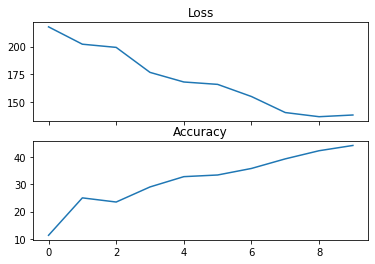

In [ ]:
list_loss = []
list_accuracy = []

list_loss, list_accuracy = train(model=resnet152, loss_fn=loss_function, optimizer=optimizer, train_loader=train_loader, 
                                 batch_size=batch_size, num_epochs=num_epochs, input_size=input_size)
test_accuracy(model=resnet152, test_loader=test_loader, input_size=input_size)
plot_learning_curve(list_loss, list_accuracy)

Report: In your report, include all your choices (i.e. hyperparameters, lr, models, loss, opti-
mizer) and explain why you made those choices to achieve your performance. Your report must be
thorough and comprehensive, please discuss fully how you were able to obtain a high performance.

input_size = 8144
num_epochs = 10
lr = 2e-4
num_classes = 196
batch_size = 100

The Stanford Car dataset website stated that there are 8,144 images for training. Random numbers still worked for some reason, and honestly I couldn't scratch my head why so I just decided to just stick to using 8144.

I've been using 10 epochs consistently and because of lack of GPU space, I decided it would just be best to stick with what works.

It felt that 1e-3 was too high for a learning rate and I could see overfitting issues from Phase 1, so I decided to decrease it. Anything with e-5 was seeing lots of underfitting from Phase 1 so e-4 just seemed right in between.

The num of classes is 196 because it is the out channels of the last layer of the model's neural network. 

Batch size is 100 because it was what I was using for all the previous training and testing runs. It felt like a good fit so I didn't feel the need to change it as much compared to the other parameters.

There are clearly some more ways to achieve more performance. I believe that a much higher accuracy can be achieved if the model was retrained with additional layers unfrozen. I ran the training with only the last layer unfrozen, but I think even just the inclusion of the few layers before that being unfrozen would produce better results. Though I have to say, 60% is a lot higher than I anticipated because Phase 2 results from freezing yielded about half of that result. 

